In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn import datasets

[ 1.52323838 -2.17016492 -0.25787106]
[[ 0.          0.          0.76190476  1.52323838]
 [ 0.         -0.61111111 -1.37301587 -2.17016492]
 [ 0.          0.          0.         -0.25787106]]
[0.75       0.24074074 0.11375661 0.        ]


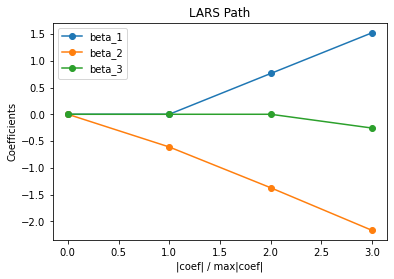

In [2]:
X = np.array(
    [[-2, -1.5, 0],
     [0, -0.5, 0.5],
     [0.5, 0, 1.5],
     [0.5, 0, -1.5],
     [0.5, 0.5, 0],
     [0.5, 1.5, -0.5]]
)
y = np.array([0, 2, 0, 1, -1, -2])

reg = linear_model.Lars(fit_intercept=False)
reg.fit(X, y)
# reg.get_params()
print(reg.coef_)
print(reg.coef_path_)
print(reg.alphas_)
xx = np.sum(np.abs(reg.coef_path_.T), axis=1)
xx /= xx[-1]


for i in range(3):
#     print(reg.coef_path_[i, i])
    plt.plot(reg.coef_path_[i, :], 'o-', label='beta_' + str(i + 1))
ymin, ymax = plt.ylim()
# plt.vlines(xx, ymin, ymax, linestyle='dashed')
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LARS Path')
plt.legend()
plt.axis('tight')
plt.show()

In [3]:
n, p = X.shape
beta = np.zeros(p)
# sign = np.zeros(p)
r = y.copy()
corr = X.T @ r
best_feat = np.argmax(np.abs(corr))
A = [best_feat]
d = np.zeros(p)
beta_path = np.zeros((p, p + 1))
for i in range(1, p + 1):
    d[A] = np.linalg.inv(X[:, A].T @ X[:, A]) @ X[:, A].T @ r
    alpha = 1.0
    for j in range(p):
        if j in A:
            continue
        alpha_temp = dict()
        alpha_temp['+'] = (corr[best_feat] - corr[j]) / (corr[best_feat] - (X @ d).T @ X[:, j])
        alpha_temp['-'] = (corr[best_feat] + corr[j]) / (corr[best_feat] + (X @ d).T @ X[:, j])

        for key in alpha_temp.keys():
            if alpha_temp[key] < 0:
                alpha_temp[key] = np.inf

            if alpha_temp[key] < alpha:
                alpha = alpha_temp[key]
                best_feat_temp = j
        
    beta[A] = beta[A] + alpha * d[A]      
    beta_path[:, i] = beta
    r = r - alpha * (X[:, A] @ d[A])
    A.append(best_feat_temp)
    corr = X.T @ r
    best_feat = best_feat_temp

[ 1.52323838 -2.17016492 -0.25787106]
[[ 0.          0.          0.76190476  1.52323838]
 [ 0.         -0.61111111 -1.37301587 -2.17016492]
 [ 0.          0.          0.         -0.25787106]]


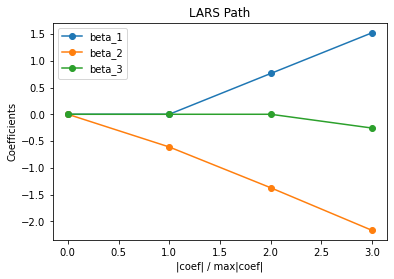

In [4]:
print(beta)
print(beta_path)
for i in range(3):
    plt.plot(beta_path[i, :], 'o-', label='beta_' + str(i + 1))
ymin, ymax = plt.ylim()
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LARS Path')
plt.legend()
plt.axis('tight')
plt.show()

In [5]:
n, p = X.shape
beta = np.zeros(p)
# sign = np.zeros(p)
r = y.copy()
corr = X.T @ r
best_feat = np.argmax(np.abs(corr))
A = [best_feat]
d = np.zeros(p)
beta_path = np.zeros((p, p + 1))
for i in range(1, p + 1):
    d[A] = np.linalg.inv(X[:, A].T @ X[:, A]) @ X[:, A].T @ r
    alpha = 1.0
    for j in range(p):
        if j in A:
            continue
        alpha_temp = dict()
        alpha_temp['+'] = (corr[j]  - corr[best_feat]) / (X[:, j].T @ X[:, A] @ d[A] - X[:, best_feat].T @ X[:, A] @ d[A])
        alpha_temp['-'] = (corr[j]  + corr[best_feat]) / (X[:, j].T @ X[:, A] @ d[A] + X[:, best_feat].T @ X[:, A] @ d[A])

        for key in alpha_temp.keys():
            if alpha_temp[key] < 0:
                alpha_temp[key] = np.inf

            if alpha_temp[key] < alpha:
                alpha = alpha_temp[key]
                best_feat_temp = j
        
    beta[A] = beta[A] + alpha * d[A]      
    beta_path[:, i] = beta
    r = r - alpha * (X[:, A] @ d[A])
    A.append(best_feat_temp)
    corr = X.T @ r
    best_feat = best_feat_temp

In [6]:
print(beta_path)

[[ 0.          0.          0.76190476  1.52323838]
 [ 0.         -0.61111111 -1.37301587 -2.17016492]
 [ 0.          0.          0.         -0.25787106]]


[ 1.52323838 -2.17016492 -0.25787106]
[[ 0.          0.          0.76190476  1.52323838]
 [ 0.         -0.61111111 -1.37301587 -2.17016492]
 [ 0.          0.          0.         -0.25787106]]


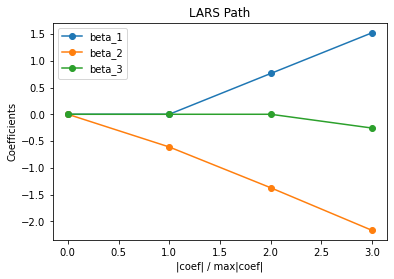

In [7]:
print(beta)
print(beta_path)
for i in range(3):
    plt.plot(beta_path[i, :], 'o-', label='beta_' + str(i + 1))
ymin, ymax = plt.ylim()
plt.xlabel('|coef| / max|coef|')
plt.ylabel('Coefficients')
plt.title('LARS Path')
plt.legend()
plt.axis('tight')
plt.show()